# Unidad 2: Modelos supervisados

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Predicción de valores continuos con regresión lineal

### Estimación del modelo mediante mínimos cuadrados

In [2]:
def stepGradient(par, x, y, learningRate):
    b_0_gradient = 0
    b_1_gradient = 0
    N = float(len(x))
    
    for i in range(0, len(x)):
        b_0_gradient += (2/N) *        (y[i] - (par[0] + par[1] * x[i]))
        b_1_gradient += (2/N) * x[i] * (y[i] - (par[0] + par[1] * x[i]))
        
    new_b_0 = par[0] + (learningRate * b_0_gradient)
    new_b_1 = par[1] + (learningRate * b_1_gradient)
    
    return [new_b_0, new_b_1]

def fitGradient(par, x, y, learningRate, maxDifference = 1e-6, maxIter = 30):
    prev_step = par[:]
    num_iter = 0;
    
    num_iter += 1
    results = stepGradient(prev_step, trX, trY, learningRate)   
    difference = abs(prev_step[0] - results[0]) + abs(prev_step[1] - results[1])

    while ((difference > maxDifference) & (num_iter < maxIter)):
        num_iter += 1
        prev_step = results
        results = stepGradient(prev_step, trX, trY, learningRate)    
        difference = abs(prev_step[0] - results[0]) + abs(prev_step[1] - results[1])

    return results

trX = np.linspace(-2, 2, 101)
trY = 3 + 2 * trX + np.random.randn(*trX.shape) * 0.33

print(fitGradient([1,1], trX, trY, 0.05))

[2.8529475276660223, 1.9862787712012564]


Se puede representar gráficamente la función del gradiente descendiente

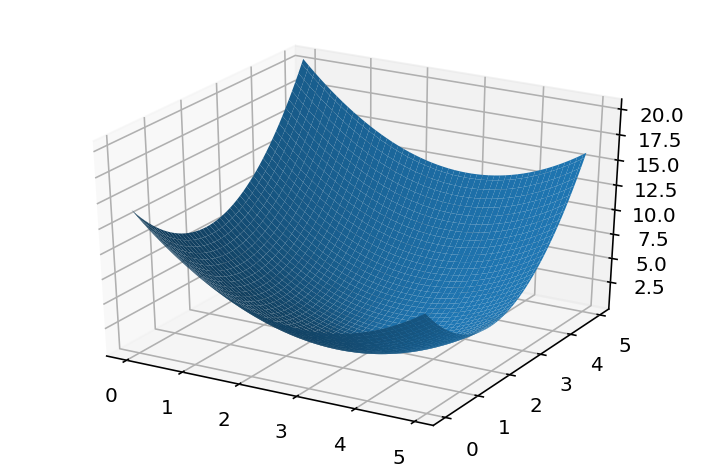

In [3]:
from mpl_toolkits.mplot3d import Axes3D

def computeLinealRegressionError(b0, b1, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (b0 + b1 * x[i])) ** 2
    return totalError / float(len(x))

b_0 = np.arange(0, 5, 0.05)
b_1 = np.arange(0, 5, 0.05)
X, Y = np.meshgrid(b_0, b_1)
    
zs = np.array([computeLinealRegressionError(x, y, trX, trY) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

figure().add_subplot(111, projection = '3d').plot_surface(X, Y, Z)

### Regresión lineal con de scikit-learn
En `scikit-learn` los modelos de regresión lineal se implementa con la clase `LinearRegression`. En el siguiente ejemplo se muestra los pasos necesarios para conseguir una regresión lineal.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
 
# Conjunto de datos
x = [[80], [79], [83], [84], [78], [60], [82], [85], [79], [84], [80], [62]]
y = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Creación del modelo
model = LinearRegression()
model.fit(x, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model.predict([[70]]))
print

# Predicción del modelo
y_pred = model.predict(x);

# Obtención de los parametros de ajuste
print('w_0', model.intercept_[0])
print('w_1', model.coef_[0][0])

print('R^2', model.score(x, y))
print('Error cuadrático medio', mean_squared_error(y_pred, y))
print('Error absoluto medio', mean_absolute_error(y_pred, y))
print('Mediana del error absoluto', median_absolute_error(y_pred, y))

Con 70 horas la producción sería: [[274.87943262]]
w_0 31.741134751773075
w_1 3.473404255319149
R^2 0.9101048533632331
Error cuadrático medio 74.6778959810874
Error absoluto medio 7.517730496453898
Mediana del error absoluto 6.792553191489361


Para representar el modelo de forma gráfica se puede utilizar las siguientes lineas de codigo:

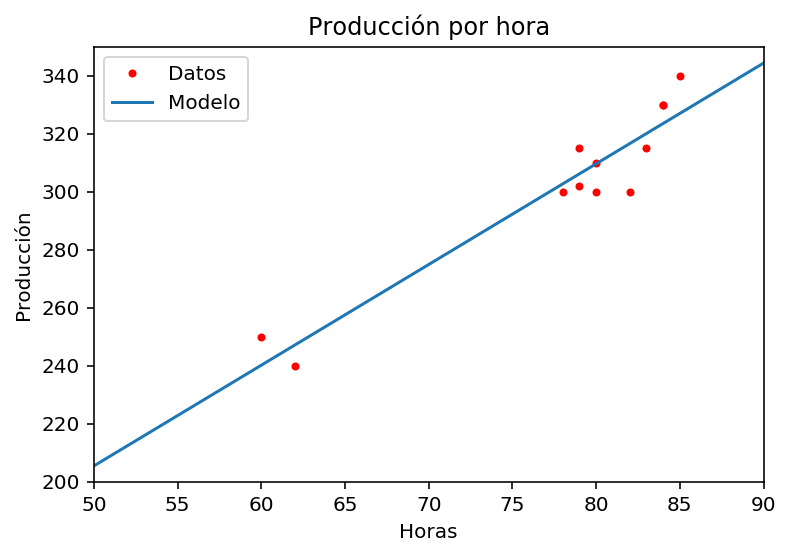

In [5]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
axis([50, 90, 200, 350])

legend(loc = 2)

Al analizar los resultados de este ajuste se puede observar que el término independiente es mayor que cero. Teniendo en cuenta que el modelo utilizado es de la forma:
$$y=w_0+w_1x$$
 
Esto índica que el modelo implementado no realiza una estimación correcta cuando se trabajan 0 horas, ya que en este caso la producción esperada sería igual al valor del término independiente. La solución de este problema se puede obtener haciendo un modelo en el que no exista término independiente.

In [6]:
# Modelo sin término de independiente
model_ni = LinearRegression(fit_intercept = False)
model_ni.fit(x, y)

# Obtención de estimaciones
print('Con 70 horas la producción sería:', model_ni.predict([[70]])[0])
print

# Obtención de los parametros de ajuste
print('w_0', model_ni.intercept_)
print('w_1', model_ni.coef_[0][0])
print('R^2', model_ni.score(x, y))

Con 70 horas la producción sería: [271.3335141]
w_0 0.0
w_1 3.8761930585683295
R^2 0.8977400845135438


Una forma de comparar la validez de los dos modelos es mediante la representación grafica de las predicciones de ambos y los datos en una misma figura.

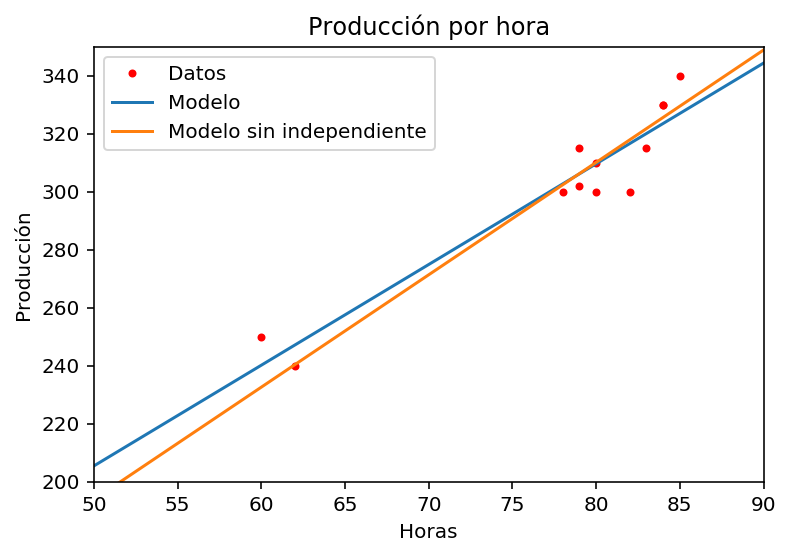

In [7]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')
plot(x_p, model_ni.predict(x_p), label = 'Modelo sin independiente')

title(u'Producción por hora')
xlabel('Horas')
ylabel(u'Producción')
axis([50, 90, 200, 350])

legend(loc = 2)

### Regresión lineal múltiple

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 2, include_bias = False)
x_2     = poly_2.fit_transform(x)

model_2 = LinearRegression(fit_intercept = False)
model_2.fit(x_2, y)

# Obtención de los parametros de ajuste
print('w_1', model_2.coef_[0][0])
print('w_2', model_2.coef_[0][1])
print('R^2', model_2.score(x_2, y))

w_1 4.316682043504311
w_2 -0.005542891455553257
R^2 0.9075927030666263


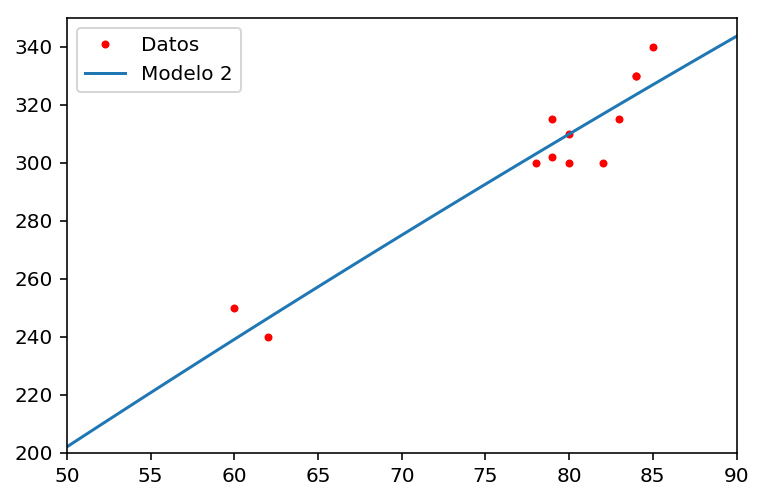

In [9]:
x_p = [[i] for i in range(50, 91)]
y_2 = model_2.predict(poly_2.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_2, label = 'Modelo 2')
axis([50, 90, 200, 350])
legend(loc = 2)

Las predicciones del modelo basado en un polinomio de grado dos parecen mejores que los resultados obtenidos con el modelo lineal. Se puede repetir el ejercicio con un polinomio de grado 5.

In [12]:
# Polinomio de grado 5
poly_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5     = poly_5.fit_transform(x)
model_5 = LinearRegression(fit_intercept = False)
model_5.fit(x_5, y)

print("Modelo 1 - R^2:", model_ni.score(x, y))
print("Modelo 2 - R^2:", model_2.score(x_2, y))
print("Modelo 5 - R^2:", model_5.score(x_5, y))

Modelo 1 - R^2: 0.8977400845135438
Modelo 2 - R^2: 0.9075927030666263
Modelo 5 - R^2: 0.969051584370978


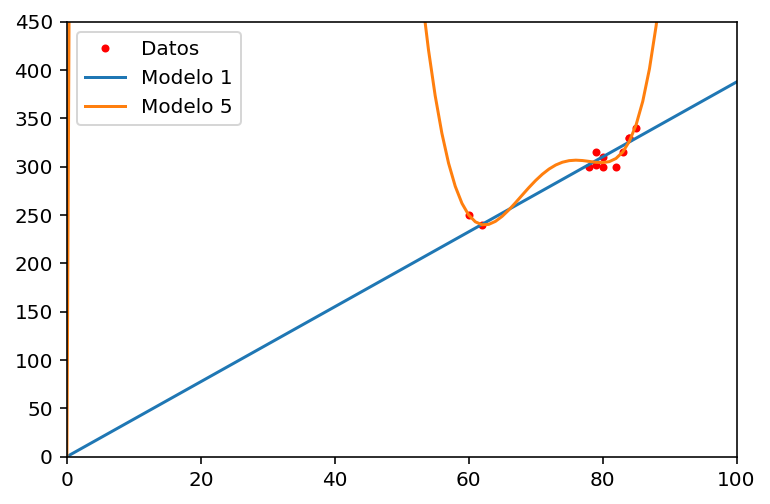

In [13]:
x_p = [[i] for i in range(0, 101)]
y_1 = model_ni.predict(x_p)
y_5 = model_5.predict(poly_5.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_1, label = 'Modelo 1')
plot(x_p, y_5, label = 'Modelo 5')

axis([0, 100, 0, 450])
legend(loc = 2)

### Validación cruzada

In [12]:
from sklearn.datasets import load_boston

# Importación de los datos de vienda de Boston
boston = load_boston()

# Creación de un modelo 
model_boston = LinearRegression()
model_boston.fit(boston.data, boston.target)

print("R^2:", model_boston.score(boston.data, boston.target))

R^2: 0.740607742865


In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target)

# Creación de un modelo
model = LinearRegression()
model.fit(x_train, y_train)

predit_train = model.predict(x_train)
predit_test = model.predict(x_test)

# Evaluación de R2
print('R2 en entrenamiento es: ', model.score(x_train, y_train))
print('R2 en validación es: ', model.score(x_test, y_test))

R2 en entrenamiento es:  0.730273418974
R2 en validación es:  0.767863956462


### Variables Categóricas

In [14]:
import pandas as pd

# Conjunto de datos con las factorias
x = [[80, 'Factoria 1'], [79, 'Factoria 2'], [83, 'Factoria 3'],
     [84, 'Factoria 1'], [78, 'Factoria 2'], [60, 'Factoria 3'],
     [82, 'Factoria 1'], [85, 'Factoria 2'], [79, 'Factoria 3'],
     [84, 'Factoria 1'], [80, 'Factoria 2'], [62, 'Factoria 3']]
y = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Conversion de las datos a DataFrame
x_0 = pd.DataFrame(x, columns = ['Horas', 'Factoria'])
y = pd.DataFrame(y)

# Creación de variables dummies
x = pd.concat([x_0['Horas'], pd.get_dummies(x_0['Factoria'])], axis = 1)

# Polinomio de grado 5
model_dummies = LinearRegression(fit_intercept = False)
model_dummies.fit(x, y)

print("Modelo dummies - R^2:", model_dummies.score(x, y))

Modelo dummies - R^2: 0.918411912883


La variables antes de trasnfroamr es

In [15]:
x_0

,Horas,Factoria
0,80,Factoria 1
1,79,Factoria 2
2,83,Factoria 3
3,84,Factoria 1
4,78,Factoria 2
5,60,Factoria 3
6,82,Factoria 1
7,85,Factoria 2
8,79,Factoria 3
9,84,Factoria 1


Ahora se pude ver la forma de las variables después de transformarlas

In [16]:
x

,Horas,Factoria 1,Factoria 2,Factoria 3
0,80,1,0,0
1,79,0,1,0
2,83,0,0,1
3,84,1,0,0
4,78,0,1,0
5,60,0,0,1
6,82,1,0,0
7,85,0,1,0
8,79,0,0,1
9,84,1,0,0


## CLASIFICACIÓN MEDIANTE REGRESIÓN LOGÍSTICA
### Regresión logística con scikit-learn

In [17]:
from sklearn.datasets import make_classification
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix

# Creción de un conjunto de entrenamiento
X, y = make_classification(n_samples    = 2500,
                           n_features   = 3,
                           n_redundant  = 0,
                           random_state = 1)

# Creación de un conjunto de enrenamietno y test
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1)

# Ajuste del modelo logístico
classifier   = LogisticRegression().fit(x_train, y_train)
y_train_pred = classifier.predict(x_train)
y_test_pred  = classifier.predict(x_test)

# Obtención de matriz de confusión
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

print('La matriz de confusión para entrenamiento es')
print(confusion_matrix_train)
print('La matriz de confusión para test es')
print(confusion_matrix_test)

La matriz de confusión para entrenamiento es
[[862  90]
 [ 97 826]]
La matriz de confusión para test es
[[268  35]
 [ 28 294]]


In [18]:
print('La matriz de confusión para entrenamiento normalizada es')
print(confusion_matrix_train / double(sum(confusion_matrix_train)))
print('La matriz de confusión para test normalizada es')
print(confusion_matrix_test / double(sum(confusion_matrix_test)))

La matriz de confusión para entrenamiento normalizada es
[[ 0.45973333  0.048     ]
 [ 0.05173333  0.44053333]]
La matriz de confusión para test normalizada es
[[ 0.4288  0.056 ]
 [ 0.0448  0.4704]]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Resultados en el conjunto de entrenamiento')
print(' Precisión:', accuracy_score(y_train, y_train_pred))
print(' Exactitud:', precision_score(y_train, y_train_pred))
print(' Exhaustividad:', recall_score(y_train, y_train_pred))
print('')
print(' Resultados en el conjunto de test')
print(' Precisión:', accuracy_score(y_test, y_test_pred))
print(' Exactitud:', precision_score(y_test, y_test_pred))
print(' Exhaustividad:', recall_score(y_test, y_test_pred))

Resultados en el conjunto de entrenamiento
 Precisión: 0.900266666667
 Exactitud: 0.901746724891
 Exhaustividad: 0.894907908992

 Resultados en el conjunto de test
 Precisión: 0.8992
 Exactitud: 0.893617021277
 Exhaustividad: 0.913043478261


AUC: 0.898765963553


Text(0.5,1,'AUC = 0.90')

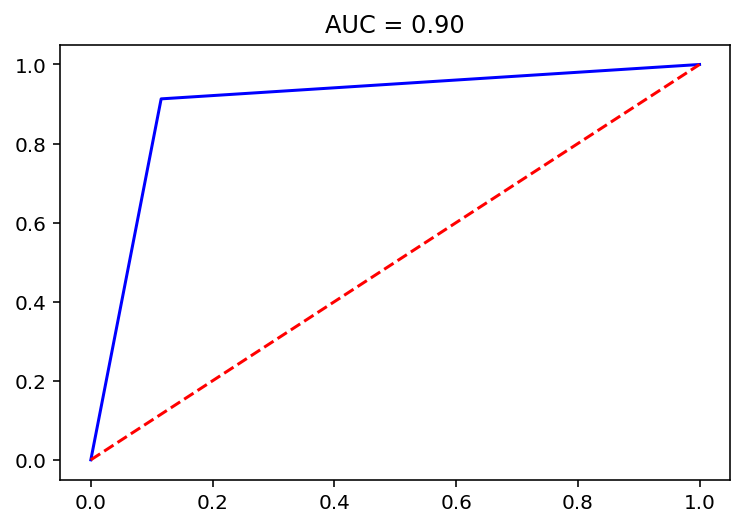

In [20]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, recall, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [21]:
prob = classifier.predict_proba(x_test)

y_th = np.ones(len(y_test), dtype=bool)

for th in (0.7, 0.3):
    for i in range(len(y_test)):
        y_th[i] = prob[i][1] > th

    print('Precisión ', th, ':', accuracy_score(y_test, y_th))
    print('Exactitud ', th, ':', precision_score(y_test, y_th))
    print('Exhaustividad ', th, ':', recall_score(y_test, y_th))
    print

Precisión  0.7 : 0.9072
Exactitud  0.7 : 0.948979591837
Exhaustividad  0.7 : 0.866459627329
Precisión  0.3 : 0.88
Exactitud  0.3 : 0.829333333333
Exhaustividad  0.3 : 0.965838509317


## ARBOLES DE DECISIÓN

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = 'entropy',
                                       random_state = 1).fit(x_train, y_train)
y_pred        = dt_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 1.0
Exactitud: 1.0
Exhaustividad: 1.0


AUC: 1.0


Text(0.5,1,'AUC = 1.00')

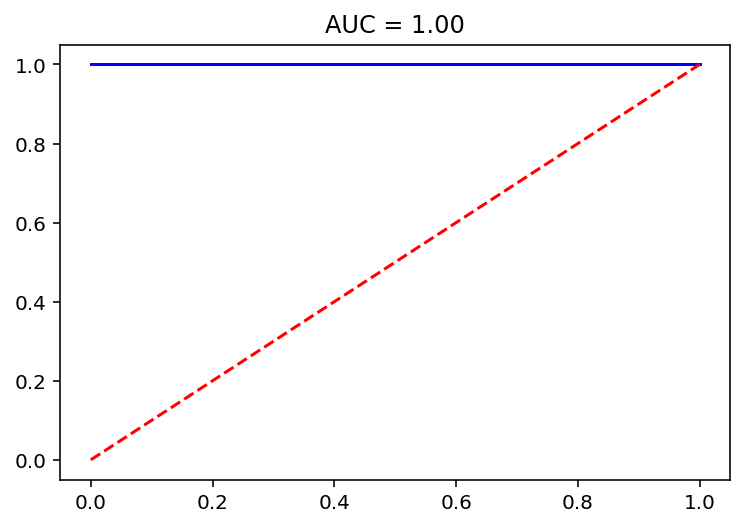

In [23]:
false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [24]:
y_pred     = dt_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.912
Exactitud: 0.908256880734
Exhaustividad: 0.922360248447


AUC: 0.911675173729


Text(0.5,1,'AUC = 0.91')

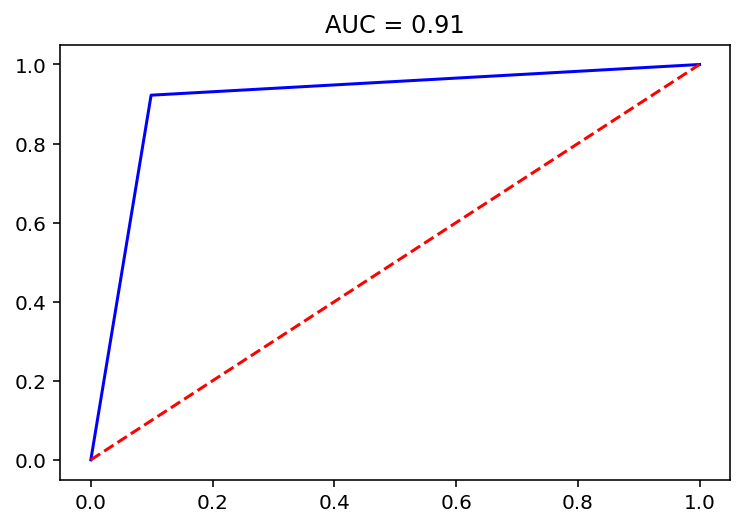

In [25]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [26]:
dt_classifier = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 1)
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.924266666667
Exactitud: 0.930540242558
Exhaustividad: 0.914409534128


AUC: 0.92411653177


Text(0.5,1,'AUC = 0.92')

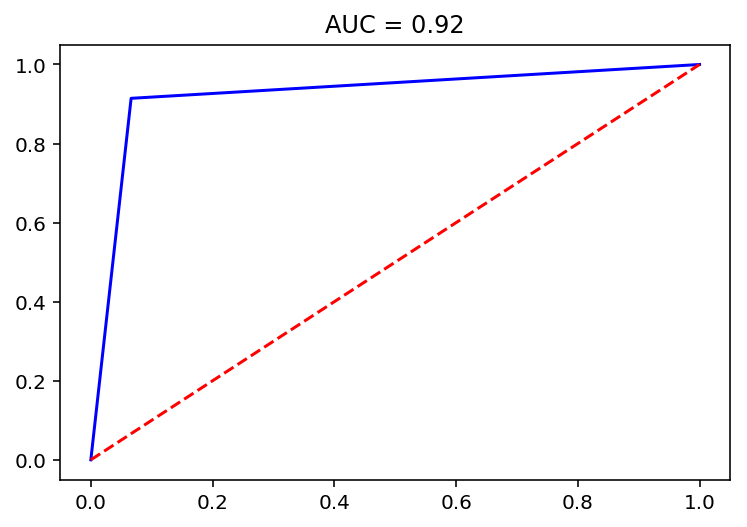

In [27]:
false_positive_rate, recall, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [28]:
y_pred     = dt_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.9024
Exactitud: 0.891891891892
Exhaustividad: 0.922360248447


AUC: 0.90177418363


Text(0.5,1,'AUC = 0.90')

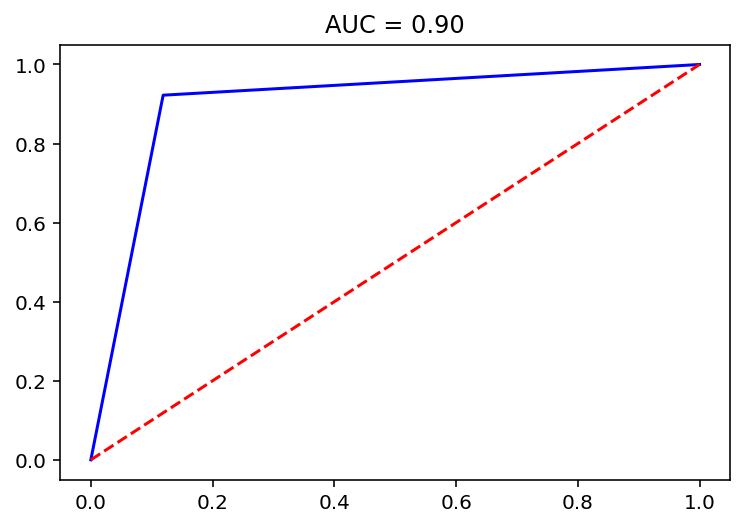

In [29]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

In [30]:
print(dt_classifier.feature_importances_)

[ 0.          0.83530293  0.16469707]


In [31]:
best_features = np.arange(len(dt_classifier.feature_importances_))
best_features = np.delete(best_features, np.argmin(dt_classifier.feature_importances_))

dt_classifier = DecisionTreeClassifier(max_depth = 4,
                                       criterion = 'entropy',
                                       random_state = 1)
dt_classifier.fit(x_train[:, best_features], y_train)
y_pred        = dt_classifier.predict(x_train[:,best_features])

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.924266666667
Exactitud: 0.930540242558
Exhaustividad: 0.914409534128


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 10,
                                       random_state = 1).fit(x_train, y_train)
y_pred        = rf_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.9904
Exactitud: 0.993456924755
Exhaustividad: 0.986998916576


In [33]:
y_pred     = rf_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.9168
Exactitud: 0.921875
Exhaustividad: 0.916149068323


In [34]:
rf_classifier = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 10,
                                       max_depth = 4,
                                       random_state = 1)
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.8928
Exactitud: 0.926713947991
Exhaustividad: 0.84940411701


In [35]:
y_pred     = rf_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.8752
Exactitud: 0.896103896104
Exhaustividad: 0.857142857143


## OTROS MODELOS SUPERVISADOS
### Maquinas de vector de soporte

In [36]:
from sklearn.svm import SVC

svm_classifier = SVC().fit(x_train, y_train)
y_pred         = svm_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.920533333333
Exactitud: 0.912579957356
Exhaustividad: 0.927410617551


In [37]:
y_pred     = svm_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.9248
Exactitud: 0.908011869436
Exhaustividad: 0.950310559006


AUC: 0.924000163992


Text(0.5,1,'AUC = 0.92')

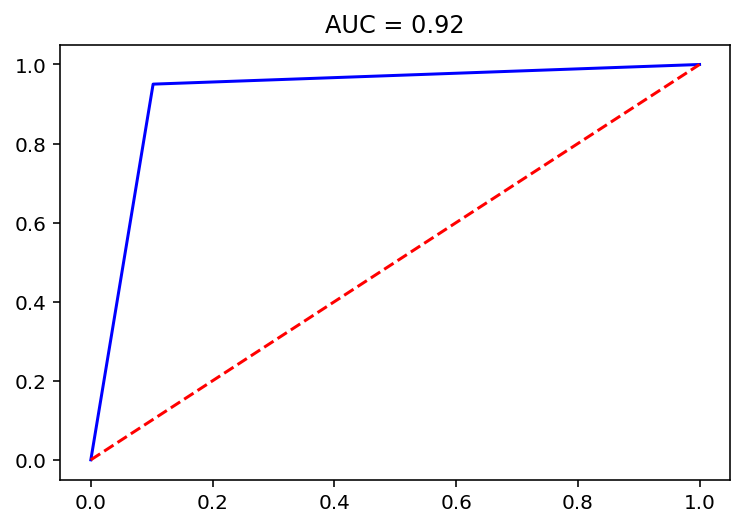

In [38]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)

### Naïve Bayes


In [39]:
from sklearn import naive_bayes

nb_classifier = naive_bayes.GaussianNB().fit(x_train, y_train)
y_pred        = nb_classifier.predict(x_train)

print('Precisión:', accuracy_score(y_train, y_pred))
print('Exactitud:', precision_score(y_train, y_pred))
print('Exhaustividad:', recall_score(y_train, y_pred))

Precisión: 0.8896
Exactitud: 0.886609071274
Exhaustividad: 0.889490790899


In [40]:
y_pred     = nb_classifier.predict(x_test)

print('Precisión:', accuracy_score(y_test, y_pred))
print('Exactitud:', precision_score(y_test, y_pred))
print('Exhaustividad:', recall_score(y_test, y_pred))

Precisión: 0.8848
Exactitud: 0.865497076023
Exhaustividad: 0.919254658385


AUC: 0.883719738433


Text(0.5,1,'AUC = 0.88')

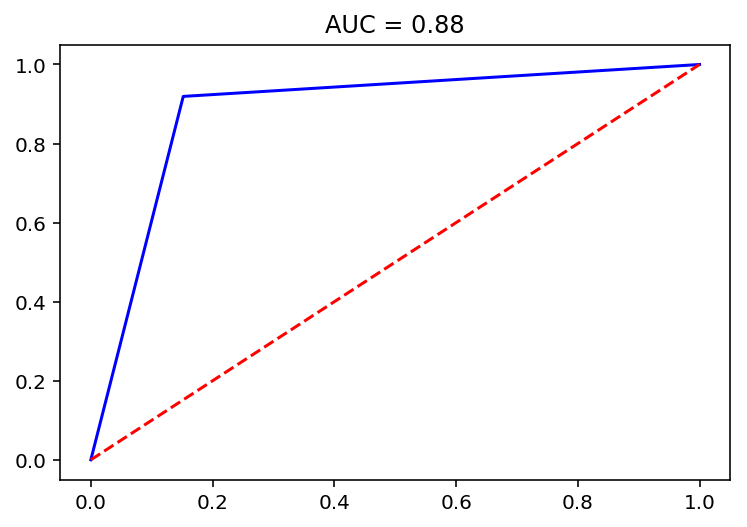

In [41]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, recall)

print('AUC:', auc(false_positive_rate, recall))

plot(false_positive_rate, recall, 'b')
plot([0, 1], [0, 1], 'r--')
title('AUC = %0.2f' % roc_auc)